# Dados e Aprendizagem Automática
### Part V

## **I - Feature Engineering using Incidents Dataset**

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

*Load the CSV - Incidents*

In [74]:
incid = pd.read_csv("incidents.csv")

**EDA**

In [75]:
incid.columns

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain',
       'incidents'],
      dtype='object')

In [76]:
incid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           2972 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [77]:
incid.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,NaN
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,NaN
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


**Dealing with missing values**

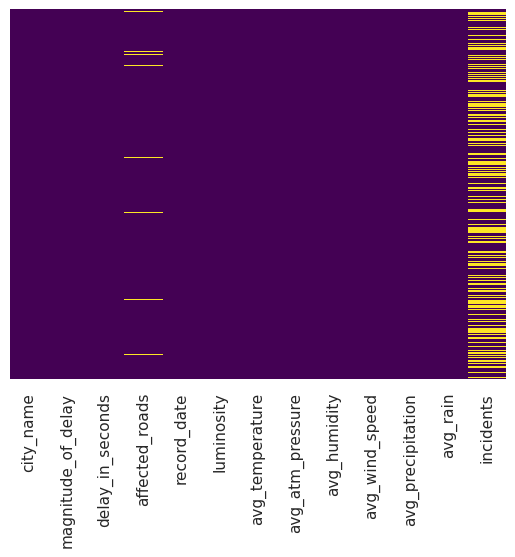

In [78]:
sns.heatmap(incid.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [79]:
incid.isnull().sum()

city_name                0
magnitude_of_delay       0
delay_in_seconds         0
affected_roads          85
record_date              0
luminosity               0
avg_temperature          0
avg_atm_pressure         0
avg_humidity             0
avg_wind_speed           0
avg_precipitation        0
avg_rain                 0
incidents             2028
dtype: int64

In [80]:
incid['affected_roads'].head()

0                                                    ,
1                                                N101,
2                                                    ,
3    N101,R206,N105,N101,N101,N101,N101,N101,N101,N...
4                            N101,N101,N101,N101,N101,
Name: affected_roads, dtype: object

In [81]:
incid[incid['affected_roads'].isnull()]

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
29,Guimaraes,UNDEFINED,64,NaN,2021-01-22 09:00,LIGHT,8.0,1012.0,91.0,4.0,0.0,Sem Chuva,Medium
76,Guimaraes,UNDEFINED,223,NaN,2021-01-29 08:00,LIGHT,11.0,1022.0,92.0,1.0,0.0,Sem Chuva,High
79,Guimaraes,MAJOR,80,NaN,2021-12-24 21:00,DARK,11.0,1004.0,92.0,0.0,0.0,Sem Chuva,NaN
91,Guimaraes,UNDEFINED,52,NaN,2021-03-02 13:00,LIGHT,13.0,1024.0,78.0,2.0,0.0,Sem Chuva,Low
109,Guimaraes,UNDEFINED,139,NaN,2021-12-27 13:00,LIGHT,15.0,1014.0,88.0,5.0,0.0,Sem Chuva,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,Guimaraes,MAJOR,298,NaN,2021-12-22 13:00,LIGHT,16.0,1015.0,71.0,3.0,0.0,Sem Chuva,NaN
4811,Guimaraes,UNDEFINED,96,NaN,2021-03-11 15:00,LIGHT,13.0,1025.0,89.0,3.0,0.0,chuva fraca,Medium
4838,Guimaraes,UNDEFINED,36,NaN,2021-03-10 13:00,LIGHT,14.0,1025.0,65.0,2.0,0.0,Sem Chuva,Low
4854,Guimaraes,UNDEFINED,233,NaN,2021-01-29 20:00,DARK,11.0,1017.0,92.0,1.0,0.0,Sem Chuva,High


*Copy data to try different options of handling data*

In [82]:
incid1 = incid.copy()
incid2 = incid.copy()

**a) Drop**

In [83]:
incid1.drop(['affected_roads'], axis=1, inplace=True, errors='ignore')
incid1.head()

,city_name,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,NaN
1,Guimaraes,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,NaN
2,Guimaraes,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


**b) Fill with zero**

In [84]:
incid2.fillna(0, inplace = True)
incid2.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,0
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,0
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


We will choose to *drop* the column since it does not bring added value to our goal

In [85]:
incid.drop(['affected_roads'], axis = 1, inplace = True)

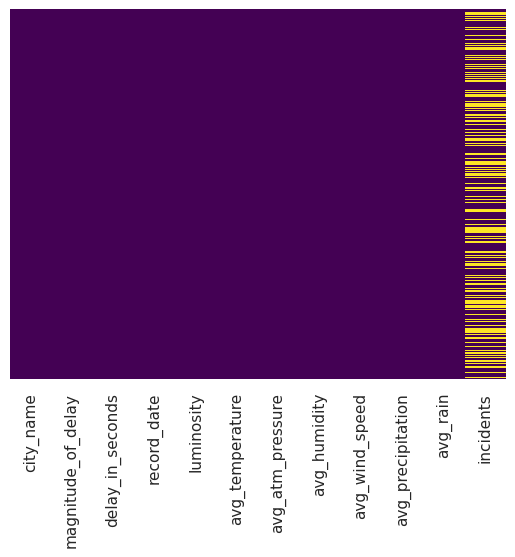

In [86]:
sns.heatmap(incid.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [87]:
incid.isnull().sum()

city_name                0
magnitude_of_delay       0
delay_in_seconds         0
record_date              0
luminosity               0
avg_temperature          0
avg_atm_pressure         0
avg_humidity             0
avg_wind_speed           0
avg_precipitation        0
avg_rain                 0
incidents             2028
dtype: int64

In [88]:
incid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   record_date         5000 non-null   object 
 4   luminosity          5000 non-null   object 
 5   avg_temperature     5000 non-null   float64
 6   avg_atm_pressure    5000 non-null   float64
 7   avg_humidity        5000 non-null   float64
 8   avg_wind_speed      5000 non-null   float64
 9   avg_precipitation   5000 non-null   float64
 10  avg_rain            5000 non-null   object 
 11  incidents           2972 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 468.9+ KB


In [89]:
incid.head()

,city_name,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,NaN
1,Guimaraes,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,NaN
2,Guimaraes,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


There are features that are of the type <em>object</em>: <em>city_name</em>, <em>magnitude_of_delay</em>, <em>record_date</em>, <em>luminosity</em>, <em>avg_rain</em> and <em>incidents</em>.

In [90]:
incid.nunique()

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                4
dtype: int64

The features <em>city_name</em> and <em>avg_precipitation</em> have only one value. We will start with <em>avg_precipitation</em>:

In [91]:
incid['avg_precipitation'].nunique()


1

In [92]:
incid['avg_precipitation'].describe()

count    5000.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: avg_precipitation, dtype: float64

Since 0 is the unique value of <em>avg_precipitation</em> and all entries have the same value, we will *drop* this feature

In [93]:
incid.drop(['avg_precipitation'], axis = 1, inplace = True)
incid.head()

,city_name,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,NaN
1,Guimaraes,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,NaN
2,Guimaraes,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High


**Handling categoric data**

Feature <em>city_name</em>

In [94]:
incid['city_name'].head()

0    Guimaraes
1    Guimaraes
2    Guimaraes
3    Guimaraes
4    Guimaraes
Name: city_name, dtype: object

The unique value of <em>city_name</em> is <em>Guimarães</em> - we can *drop* this feature as well

In [95]:
incid.drop(['city_name'], axis = 1, inplace = True)
incid.dropna(inplace=True)

Feature <em>incidents</em>

In [96]:
print(incid['incidents'].value_counts())

incidents
High         1073
Low           718
Very_High     603
Medium        578
Name: count, dtype: int64


In [97]:
print(incid['incidents'].value_counts().count())

4


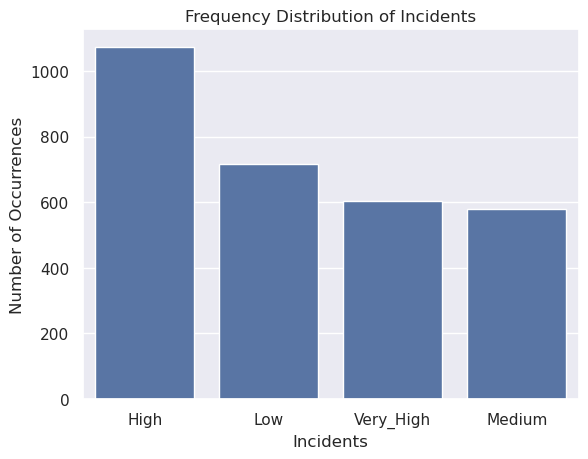

In [98]:
incidents_count = incid['incidents'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=incidents_count.index, y=incidents_count.values)
plt.title('Frequency Distribution of Incidents')
plt.ylabel('Number of Occurrences',fontsize=12)
plt.xlabel('Incidents',fontsize=12)
plt.show()

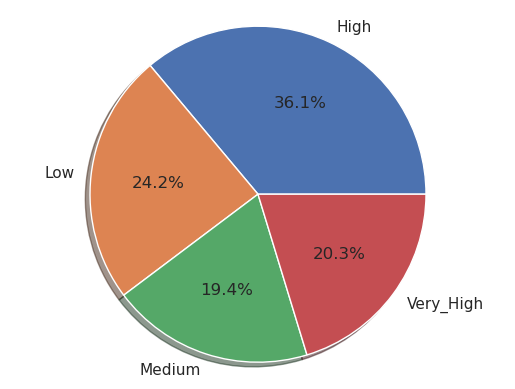

In [99]:
labels = incid['incidents'].astype('category').cat.categories.tolist()
counts = incid['incidents'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()

We have several options of how to deal with *qualitative data*:

**a) Replace Values**

In [100]:
incid3=incid.copy()
incid3.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,Medium
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,Low


Label association: None - 0, Low - 1, Medium - 2, High - 3, Very_High - 4

In [101]:
replace_map = {'incidents': {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3}}

We can create a replacement map in another way:

In [102]:
labels = incid3['incidents'].astype('category').cat.categories.tolist()
replace_map_comp = {'incidents' : {k: v for k,v in zip(labels, list(range(1,len(labels)+1)))}}
print(replace_map_comp)

{'incidents': {'High': 1, 'Low': 2, 'Medium': 3, 'Very_High': 4}}


In [103]:
incid3.replace(replace_map_comp,inplace=True)
incid3.head()

/tmp/ipykernel_25950/547542339.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  incid3.replace(replace_map_comp,inplace=True)


,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,2
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,4
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,1
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,3
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,2


In [104]:
incid3.replace(replace_map_comp,inplace=True)
incid3.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,2
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,4
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,1
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,3
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,2


In [105]:
print(incid3['incidents'])

2       2
3       4
4       1
5       3
6       2
       ..
4991    4
4992    1
4993    1
4994    3
4995    1
Name: incidents, Length: 2972, dtype: int64


**b) Label encoding**

In [106]:
incid4=incid.copy()
incid4.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,Medium
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,Low


In [107]:
print(incid4)

     magnitude_of_delay  delay_in_seconds       record_date luminosity  \
2             UNDEFINED                69  2021-03-12 15:00      LIGHT   
3                 MAJOR              2297  2021-09-29 09:00      LIGHT   
4             UNDEFINED                 0  2021-06-13 11:00      LIGHT   
5             UNDEFINED                 0  2021-12-07 23:00       DARK   
6             UNDEFINED                 0  2021-12-05 05:00       DARK   
...                 ...               ...               ...        ...   
4991              MAJOR              8360  2021-09-24 18:00      LIGHT   
4992          UNDEFINED                 0  2021-05-09 11:00      LIGHT   
4993          UNDEFINED               896  2021-06-23 16:00      LIGHT   
4994          UNDEFINED                 0  2021-06-23 22:00       DARK   
4995          UNDEFINED                 0  2021-04-13 00:00       DARK   

      avg_temperature  avg_atm_pressure  avg_humidity  avg_wind_speed  \
2                14.0            1025.

In [108]:
incid4['None'] = np.where(incid4['incidents'].str.contains('None'),1,0)
incid4.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,None
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,0
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,0
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,0
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,Medium,0
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,Low,0


With *LabelEncoder()*:

In [109]:
incid5=incid.copy()
incid6=incid.copy()

from sklearn.preprocessing import LabelEncoder

le_make = LabelEncoder()
incid5['incidents_code'] = le_make.fit_transform(incid6['incidents'])

incid5.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,incidents_code
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,1
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,3
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,0
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,Medium,2
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,Low,1


**c) One-Hot encoding**

In [110]:
incid7 = incid.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(incid7['incidents'])
lb_results_df = pd.DataFrame(lb_results,columns=lb.classes_)

lb_results_df.head()

,High,Low,Medium,Very_High
0,0,1,0,0
1,0,0,0,1
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0


In [111]:
result_df = pd.concat([incid7, lb_results_df],axis=1)
result_df.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,High,Low,Medium,Very_High
2,UNDEFINED,69.0,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,1.0,0.0,0.0,0.0
3,MAJOR,2297.0,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,0.0,0.0,1.0,0.0
4,UNDEFINED,0.0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,0.0,1.0,0.0,0.0
5,UNDEFINED,0.0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,Medium,1.0,0.0,0.0,0.0
6,UNDEFINED,0.0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,Low,0.0,0.0,0.0,1.0


**d) Binary Encoding**

|   Level   | "Decimal encoding" | Binary encoding | One-Hot encoding |
| :-------: | :----------------: | :-------------: | :--------------: |
| None      |         0          |       000       |      000001      |
| Low       |         1          |       001       |      000010      |
| Medium    |         2          |       010       |      000100      |
| High      |         3          |       011       |      001000      |
| Very_High |         4          |       100       |      010000      |

For this technique it is needed to have the package <em>category_encoders</em> installed:

<code>!pip install category_encoders</code>

In [112]:

incid8 = incid.copy()

import category_encoders as ce

bencoder = ce.BinaryEncoder(cols=['incidents'])
df_binary = bencoder.fit_transform(incid8)

df_binary.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents_0,incidents_1,incidents_2
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,0,0,1
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,0,1,0
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,0,1,1
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,1,0,0
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,0,0,1


**e) Backward difference encoding**

In [113]:
incid9 = incid.copy()

bde = ce.BackwardDifferenceEncoder(cols=['incidents'])
df_bd = bde.fit_transform(incid9)
df_bd.head()

/home/ajr/miniconda3/envs/DAA_312/lib/python3.12/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/home/ajr/miniconda3/envs/DAA_312/lib/python3.12/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents_0,incidents_1,incidents_2
2,1,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,-0.75,-0.5,-0.25
3,1,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,0.25,-0.5,-0.25
4,1,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,0.25,0.5,-0.25
5,1,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,0.25,0.5,0.75
6,1,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,-0.75,-0.5,-0.25


**f) Factorize**

In [114]:
incid10 = incid.copy()

In [115]:
incid10['incidents'] = pd.factorize(incid10['incidents'])[0] + 1
incid10.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,1
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,2
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,3
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,4
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,1


We will choose the *factorize* technique to keep going

In [116]:
incid['incidents'] = pd.factorize(incid['incidents'])[0] + 1

Regarding the features <em>magnitude_delay</em>, <em>luminosity</em> and <em>avg_rain</em>, we will *factorize* them for now

In [117]:
incid['magnitude_of_delay'] = pd.factorize(incid['magnitude_of_delay'])[0] + 1
incid['luminosity'] = pd.factorize(incid['luminosity'])[0] +1 
incid['avg_rain'] = pd.factorize(incid['avg_rain'])[0] + 1

incid.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
2,1,69,2021-03-12 15:00,1,14.0,1025.0,64.0,0.0,1,1
3,2,2297,2021-09-29 09:00,1,15.0,1028.0,75.0,1.0,1,2
4,1,0,2021-06-13 11:00,1,27.0,1020.0,52.0,1.0,1,3
5,1,0,2021-12-07 23:00,2,9.0,1015.0,94.0,0.0,1,4
6,1,0,2021-12-05 05:00,2,8.0,1026.0,87.0,1.0,1,1


**Handling dates**

*Datetime Properties and Methods* (https://pandas.pydata.org/pandas-docs/version/0.23/api.html#datetimelike-properties)

In [118]:
incid11 = incid.copy()

In [119]:
incid11['record_date'].head()

2    2021-03-12 15:00
3    2021-09-29 09:00
4    2021-06-13 11:00
5    2021-12-07 23:00
6    2021-12-05 05:00
Name: record_date, dtype: object

In [133]:
incid11['record_date'] = pd.to_datetime(incid11['record_date'], format='%Y-%m-%d %H:%M', errors='coerce')
missing_dates = incid11['record_date'].isnull().sum()


In [135]:
assert incid11['record_date'].isnull().sum() == 0, 'missing record date'

AssertionError: missing record date

In [136]:
incid11['record_date'].head()

2   NaT
3   NaT
4   NaT
5   NaT
6   NaT
Name: record_date, dtype: datetime64[ns]

In [138]:
incid11['record_date_year'] = incid11['record_date'].dt.year
incid11['record_date_month'] = incid11['record_date'].dt.month
incid11['record_date_day'] = incid11['record_date'].dt.day
incid11['record_date_hour'] = incid11['record_date'].dt.hour
incid11['record_date_minute'] = incid11['record_date'].dt.minute

In [139]:
incid11.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute
2,1,69,NaT,1,14.0,1025.0,64.0,0.0,1,1,NaN,NaN,NaN,NaN,NaN
3,2,2297,NaT,1,15.0,1028.0,75.0,1.0,1,2,NaN,NaN,NaN,NaN,NaN
4,1,0,NaT,1,27.0,1020.0,52.0,1.0,1,3,NaN,NaN,NaN,NaN,NaN
5,1,0,NaT,2,9.0,1015.0,94.0,0.0,1,4,NaN,NaN,NaN,NaN,NaN
6,1,0,NaT,2,8.0,1026.0,87.0,1.0,1,1,NaN,NaN,NaN,NaN,NaN


In [140]:
incid11.nunique()

magnitude_of_delay       3
delay_in_seconds      1167
record_date              0
luminosity               3
avg_temperature         34
avg_atm_pressure        34
avg_humidity            80
avg_wind_speed          11
avg_rain                 4
incidents                4
record_date_year         0
record_date_month        0
record_date_day          0
record_date_hour         0
record_date_minute       0
dtype: int64

Since the year and the minute have only one value, we will *drop* it

In [142]:
incid11.drop('record_date_year',axis=1, inplace = True)
incid11.drop('record_date_minute',axis=1, inplace = True)
incid11.drop('record_date',axis=1, inplace = True)
incid11.dropna(inplace = True)

KeyError: "['record_date_year'] not found in axis"

In [143]:
incid11.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour
2,1,69,NaT,1,14.0,1025.0,64.0,0.0,1,1,NaN,NaN,NaN
3,2,2297,NaT,1,15.0,1028.0,75.0,1.0,1,2,NaN,NaN,NaN
4,1,0,NaT,1,27.0,1020.0,52.0,1.0,1,3,NaN,NaN,NaN
5,1,0,NaT,2,9.0,1015.0,94.0,0.0,1,4,NaN,NaN,NaN
6,1,0,NaT,2,8.0,1026.0,87.0,1.0,1,1,NaN,NaN,NaN


In [144]:
incid12 = incid.copy()

In [145]:
incid12['record_date'] = pd.to_datetime(incid12['record_date'])
incid12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 2 to 4995
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   magnitude_of_delay  2972 non-null   int64         
 1   delay_in_seconds    2972 non-null   int64         
 2   record_date         2972 non-null   datetime64[ns]
 3   luminosity          2972 non-null   int64         
 4   avg_temperature     2972 non-null   float64       
 5   avg_atm_pressure    2972 non-null   float64       
 6   avg_humidity        2972 non-null   float64       
 7   avg_wind_speed      2972 non-null   float64       
 8   avg_rain            2972 non-null   int64         
 9   incidents           2972 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 319.9 KB


In [146]:
incid12['record_date'].head()

2   2021-03-12 15:00:00
3   2021-09-29 09:00:00
4   2021-06-13 11:00:00
5   2021-12-07 23:00:00
6   2021-12-05 05:00:00
Name: record_date, dtype: datetime64[ns]

In [147]:
import datetime

today = datetime.datetime.today()
today

datetime.datetime(2024, 10, 20, 14, 43, 26, 273433)

In [148]:
today - incid12['record_date']

2      1317 days 23:43:26.273433
3      1117 days 05:43:26.273433
4      1225 days 03:43:26.273433
5      1047 days 15:43:26.273433
6      1050 days 09:43:26.273433
                  ...           
4991   1121 days 20:43:26.273433
4992   1260 days 03:43:26.273433
4993   1214 days 22:43:26.273433
4994   1214 days 16:43:26.273433
4995   1286 days 14:43:26.273433
Name: record_date, Length: 2972, dtype: timedelta64[ns]

In [150]:
(today - incid12['record_date']).dt.days

2       1317
3       1117
4       1225
5       1047
6       1050
        ... 
4991    1121
4992    1260
4993    1214
4994    1214
4995    1286
Name: record_date, Length: 2972, dtype: int64

In [151]:
incid12['day'] = incid12['record_date']
incid12['month'] = incid12['record_date']
incid12['hour'] = incid12['record_date']
incid12['time'] = incid12['record_date']
incid12.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,day,month,hour,time
2,1,69,2021-03-12 15:00:00,1,14.0,1025.0,64.0,0.0,1,1,2021-03-12 15:00:00,2021-03-12 15:00:00,2021-03-12 15:00:00,2021-03-12 15:00:00
3,2,2297,2021-09-29 09:00:00,1,15.0,1028.0,75.0,1.0,1,2,2021-09-29 09:00:00,2021-09-29 09:00:00,2021-09-29 09:00:00,2021-09-29 09:00:00
4,1,0,2021-06-13 11:00:00,1,27.0,1020.0,52.0,1.0,1,3,2021-06-13 11:00:00,2021-06-13 11:00:00,2021-06-13 11:00:00,2021-06-13 11:00:00
5,1,0,2021-12-07 23:00:00,2,9.0,1015.0,94.0,0.0,1,4,2021-12-07 23:00:00,2021-12-07 23:00:00,2021-12-07 23:00:00,2021-12-07 23:00:00
6,1,0,2021-12-05 05:00:00,2,8.0,1026.0,87.0,1.0,1,1,2021-12-05 05:00:00,2021-12-05 05:00:00,2021-12-05 05:00:00,2021-12-05 05:00:00


In [153]:
incid['record_date'] = pd.to_datetime(incid['record_date'], format = '%Y-%m-%d %H:%M', errors='coerce')

In [154]:
incid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 2 to 4995
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   magnitude_of_delay  2972 non-null   int64         
 1   delay_in_seconds    2972 non-null   int64         
 2   record_date         2972 non-null   datetime64[ns]
 3   luminosity          2972 non-null   int64         
 4   avg_temperature     2972 non-null   float64       
 5   avg_atm_pressure    2972 non-null   float64       
 6   avg_humidity        2972 non-null   float64       
 7   avg_wind_speed      2972 non-null   float64       
 8   avg_rain            2972 non-null   int64         
 9   incidents           2972 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 319.9 KB


In [155]:
incid.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
2,1,69,2021-03-12 15:00:00,1,14.0,1025.0,64.0,0.0,1,1
3,2,2297,2021-09-29 09:00:00,1,15.0,1028.0,75.0,1.0,1,2
4,1,0,2021-06-13 11:00:00,1,27.0,1020.0,52.0,1.0,1,3
5,1,0,2021-12-07 23:00:00,2,9.0,1015.0,94.0,0.0,1,4
6,1,0,2021-12-05 05:00:00,2,8.0,1026.0,87.0,1.0,1,1
